In [1]:
"""Data inspection."""

'Data inspection.'

In [2]:
import importlib
import matplotlib
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import toylosses
importlib.reload(toylosses)
import vis
importlib.reload(vis)

CRYO_DIR = '/cryo/'

IMG_SHAPE = (90, 90)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)

TRAIN_VAL_DIR = os.path.join(CRYO_DIR, 'train_val_datasets')

TRAIN_DATASET_PATH = os.path.join(TRAIN_VAL_DIR, 'cryo_exp_3d_%s.npy' % SHAPE_STR)
VAL_DATASET_PATH = os.path.join(TRAIN_VAL_DIR, 'val_cryo_exp_3d_%s.npy' % SHAPE_STR)


OUTPUT = '/scratch/users/nmiolane/output_cryo_exp_3d'
CMAP = 'gray'
DEVICE = 'cuda'

In [7]:
train_dataset, val_dataset = datasets.get_datasets(
    dataset_name='cryo_exp_3d', batch_size=64, img_shape=(1, 90, 90))

In [15]:
DATASET_PATH = VAL_DATASET_PATH
DATASET = np.load(DATASET_PATH)

Loading /cryo/train_val_datasets/val_cryo_exp_3d_90x90.npy
Dataset shape: (14265, 1, 90, 90)


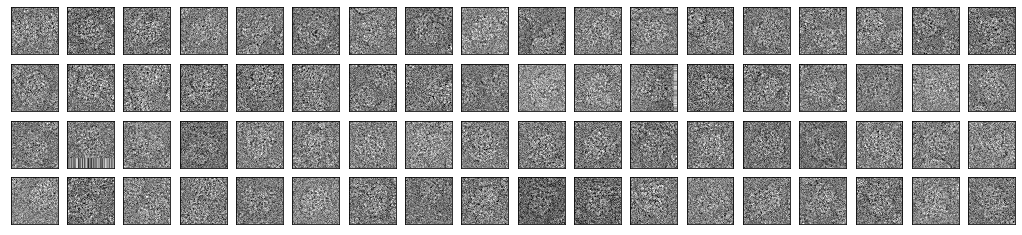

In [16]:
vis.show_data(VAL_DATASET_PATH)

Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.


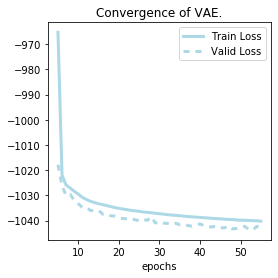

In [7]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax = vis.plot_convergence(ax=ax, output=OUTPUT, algo_name='vae', start_epoch_id=5, crit_name='total')


Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/outp

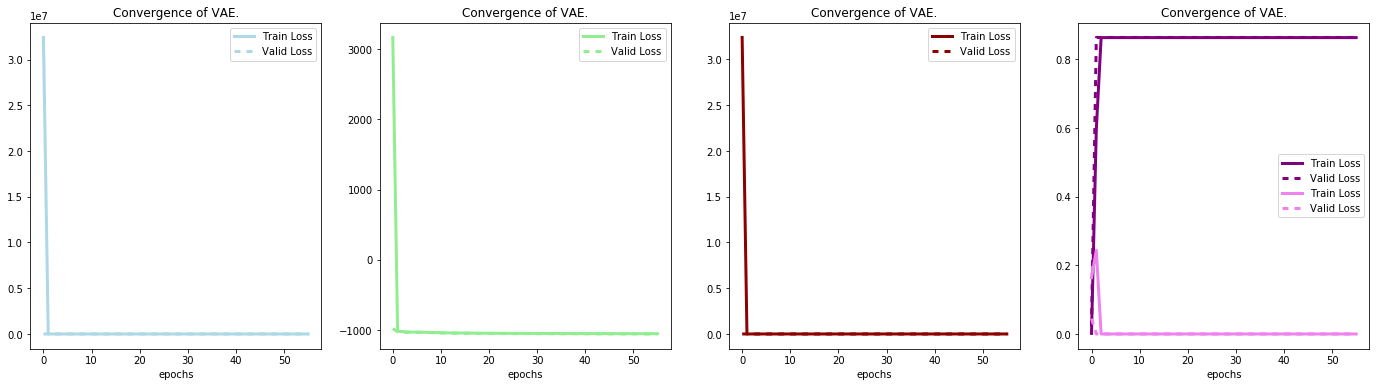

In [10]:
vis.plot_losses(OUTPUT)

Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...


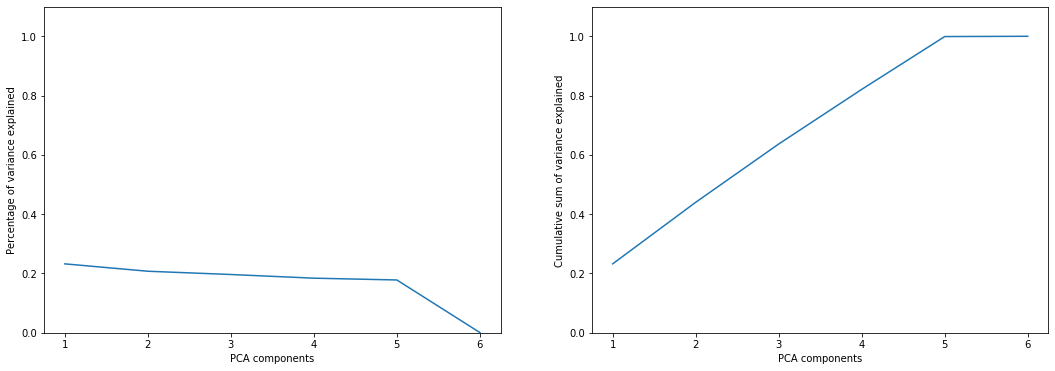

In [11]:
ax = vis.plot_variance_explained(OUTPUT, VAL_DATASET_PATH)

In [15]:
def get_cryo(dataset_path, labels_path=None, n_pca_components=2, epoch_id=None):
    labels = {}
    labels['focus'] = []
    labels['theta'] = []
    if labels_path is not None:
        with open(labels_path, 'r') as csv_file:
            reader = csv.reader(csv_file)
            for i_row, row in enumerate(reader):
                if i_row == 0:
                    continue
                labels['focus'].append(float(row[0]))
                labels['theta'].append(float(row[1]))
        
    # Note: the test dataset needs to be unshuffled here
    mus = analyze.latent_projection(output=OUTPUT, dataset_path=dataset_path, epoch_id=epoch_id)
    print(mus.shape)
    _, projected_mus = analyze.pca_projection(mus=mus, n_pca_components=n_pca_components)

    return projected_mus, labels

In [12]:
FOCUS_MAX = 3.
start = 0.5
by = 0.5
num = int((FOCUS_MAX - start) / by + 1)
colormap = cm.get_cmap('viridis')
COLORS_FOCUS = colormap(np.linspace(start=0, stop=1, num=num))

start = -180
by = 1
num = 2 * 180 + 1
colormap = cm.get_cmap('twilight')
COLORS_THETA = colormap(np.linspace(start=0, stop=1, num=num))

COLORS = {
    'focus': COLORS_FOCUS,
    'theta': COLORS_THETA
}

def plot_cryo(ax, img_path, labels_path, n_pc=2, label_name='focus', epoch_id=None):
    projected_mus, labels = get_cryo(img_path, labels_path, n_pc=n_pc, epoch_id=epoch_id)
    colored_labels = labels[label_name]
    focuses = labels['focus']

    for mu, colored_label, focus in zip(projected_mus, colored_labels, focuses):
        #if label_name == 'theta' and focus != 2.5:
        #    continue
        if label_name == 'focus':
            color_id = int(2 * colored_label) - 1
        elif label_name == 'theta':
            color_id = int((colored_label + 180))
            
        colors = COLORS[label_name]
        if n_pc == 2:
            im = ax.scatter(mu[0], mu[1], c=np.array([colors[color_id]]), s=4)
        else:
            im = ax.scatter(mu[0], mu[1], mu[2], c=np.array([colors[color_id]]))
    return im, ax

# 2D

In [16]:
projected_mus, _ = get_cryo(VAL_DATASET_PATH, n_pca_components=2)

Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(14265, 6)


(14265, 2)


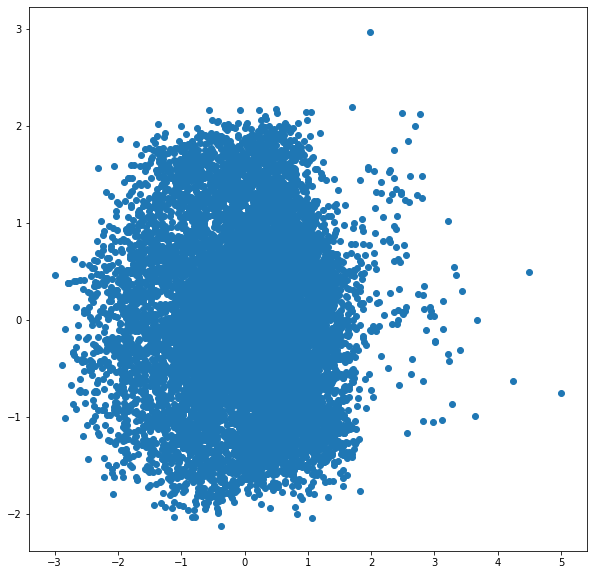

In [17]:
print(projected_mus.shape)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
im = ax.scatter(projected_mus[:, 0], projected_mus[:, 1])

# 3D

In [18]:
projected_mus, _ = get_cryo(VAL_DATASET_PATH, n_pca_components=3)

Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
(14265, 6)


In [19]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


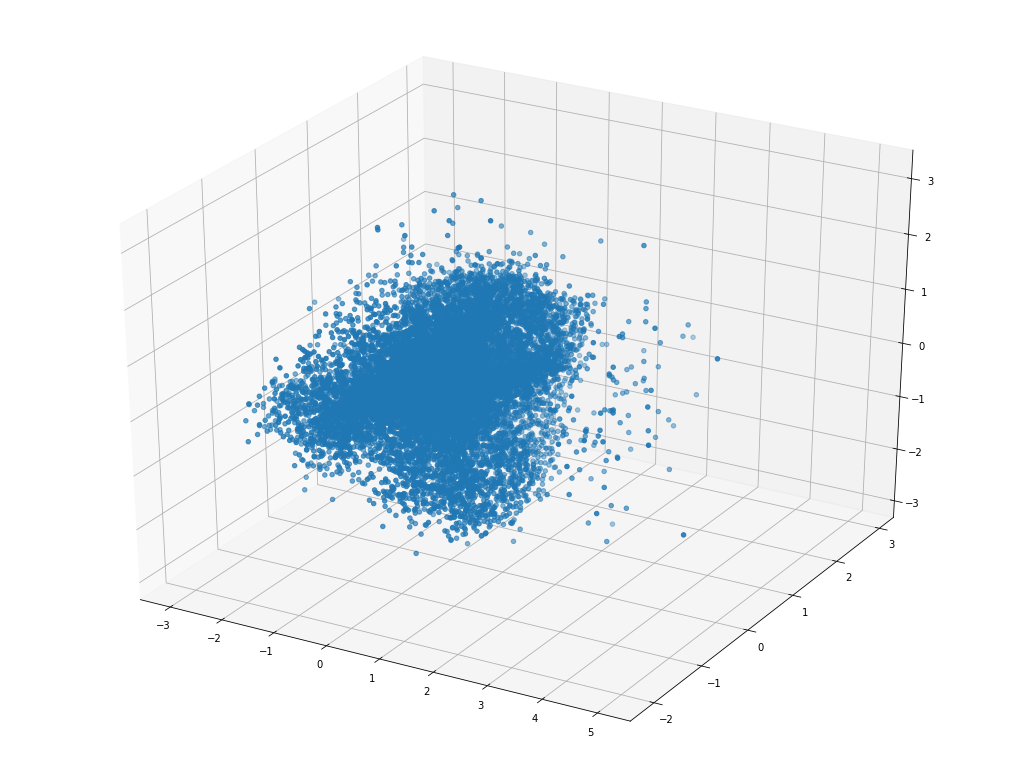

In [20]:
%matplotlib inline

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im = ax.scatter(projected_mus[:, 0], projected_mus[:, 1], projected_mus[:, 2])

# Reconstructions

Loading /cryo/train_val_datasets/val_cryo_exp_3d_90x90.npy
Dataset shape: (14265, 1, 90, 90)
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_0_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_0_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_0_checkpoint.pth.


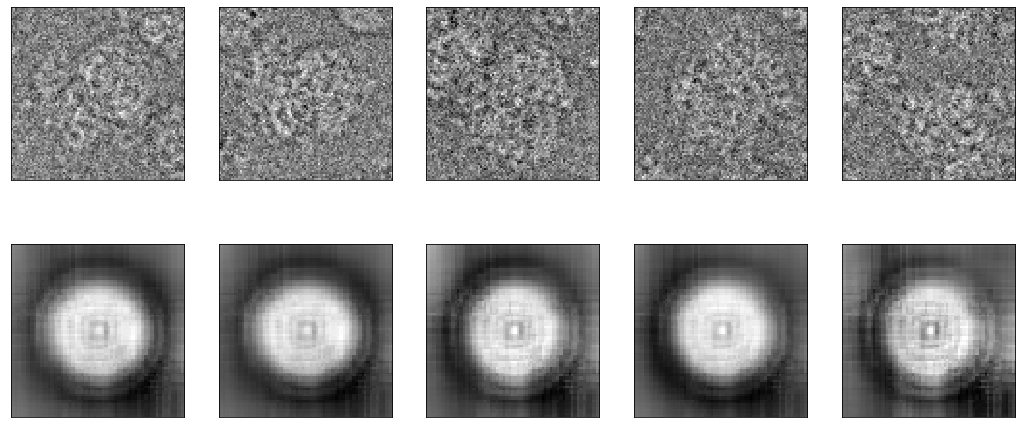

In [36]:
epoch_id = 0
vis.show_img_and_recon(OUTPUT, dataset_path=VAL_DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /cryo/train_val_datasets/val_cryo_exp_3d_90x90.npy
Dataset shape: (14265, 1, 90, 90)
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_5_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_5_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_5_checkpoint.pth.


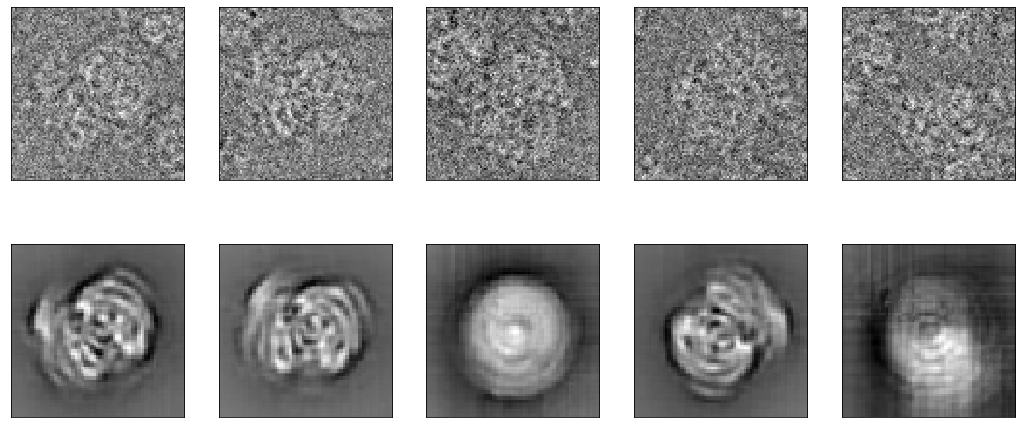

In [37]:
epoch_id = 5
vis.show_img_and_recon(OUTPUT, dataset_path=VAL_DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /cryo/train_val_datasets/val_cryo_exp_3d_90x90.npy
Dataset shape: (14265, 1, 90, 90)
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_15_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_15_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_15_checkpoint.pth.


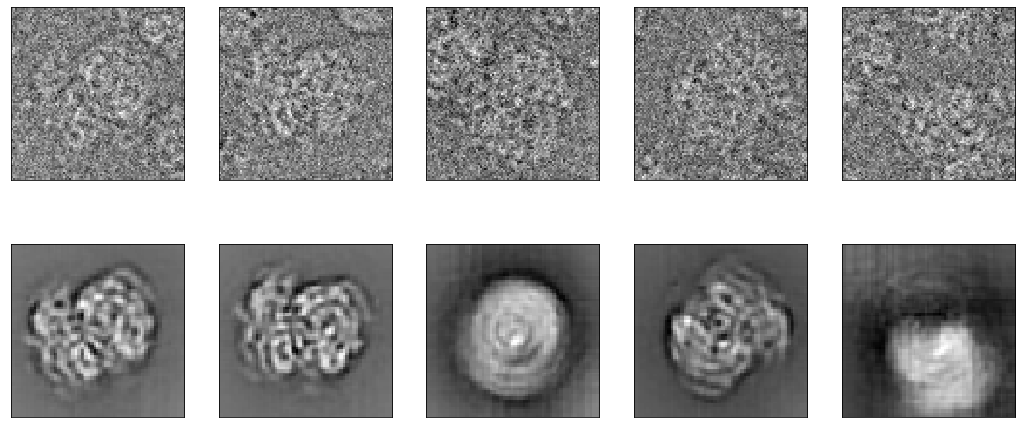

In [38]:
epoch_id = 15
vis.show_img_and_recon(OUTPUT, dataset_path=VAL_DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)

Loading /cryo/train_val_datasets/val_cryo_exp_3d_90x90.npy
Dataset shape: (14265, 1, 90, 90)
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Loading encoder from network of architecture: conv_plus...
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.
Loading decoder from network of architecture: conv_plus...
Found checkpoint. Getting: /scratch/users/nmiolane/output_cryo_exp_3d/train_vae/epoch_55_checkpoint.pth.


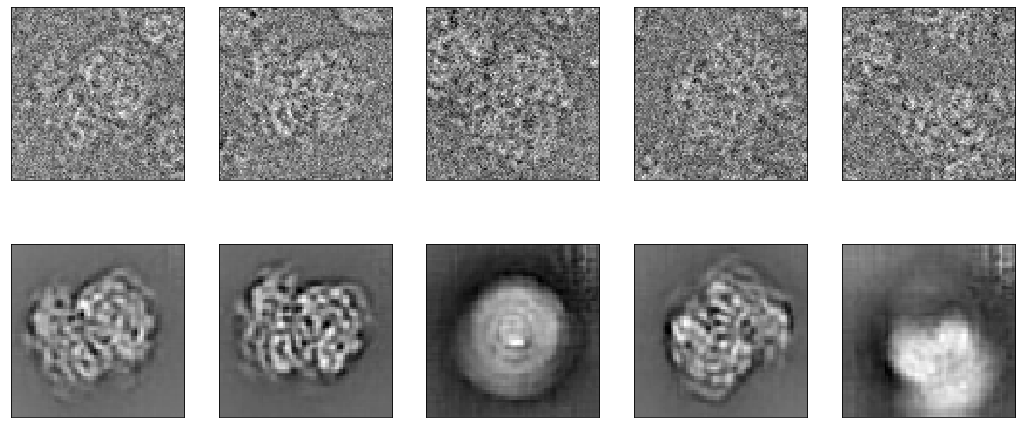

In [22]:
epoch_id = 55
vis.show_img_and_recon(OUTPUT, dataset_path=VAL_DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)